<a href="https://colab.research.google.com/github/mhusniyah/solution/blob/main/AXELSPACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 276 kB/s 


In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 22.0 MB/s 
     |████████████████████████████████| 6.3 MB 72.2 MB/s 
     |████████████████████████████████| 15.4 MB 47.7 MB/s 


In [3]:
!pip install geopandas

In [4]:
!pip install descartes

In [5]:
!pip install boto3

     |████████████████████████████████| 131 kB 19.3 MB/s 
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 8.5 MB 50.5 MB/s 
     |████████████████████████████████| 138 kB 64.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 k

In [7]:
import numpy as np

In [8]:
import rasterio as rio

In [9]:
from rasterio.plot import show

In [10]:
import geopandas as gpd

In [11]:
import matplotlib.pyplot as plt

In [12]:
import skimage.exposure

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [13]:
!pip install boto3

In [14]:
import sys

In [15]:
import os

In [16]:
import subprocess

In [17]:
import datetime

In [18]:
import platform

In [19]:
import datetime

In [20]:
FIGURE_PREFIX = '../figures/'

In [21]:
fpath_url = 'http://landsat-pds.s3.amazonaws.com/c1/'

In [22]:
fpath_ldsat = 'L8/044/034/'

In [23]:
fpath_imid = 'LC08_L1TP_044034_20190924_20191017_01_T1/'

In [24]:
fpath_band = fpath_imid[:-1] + '_B4'

In [25]:
fpath_ext = '.TIF'

In [26]:
fpath = (
    fpath_url
    + fpath_ldsat
    + fpath_imid
    + fpath_band
    + fpath_ext
)

In [27]:
print(fpath)

http://landsat-pds.s3.amazonaws.com/c1/L8/044/034/LC08_L1TP_044034_20190924_20191017_01_T1/LC08_L1TP_044034_20190924_20191017_01_T1_B4.TIF


In [28]:
fpath = 'C:\\Users\\USER\\Documents\\LC08_L1TP_044034_20190924_20191017_01_T1_B4 (1).tif'

In [29]:
fpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/044/034/LC08_L1TP_044034_20190924_20191017_01_T1/LC08_L1TP_044034_20190924_20191017_01_T1_B2.TIF'
def rasterio_open(f):
  return rio.open(f)

In [30]:
src_image = rasterio_open(fpath)
print(src_image.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7671, 'height': 7801, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(30.0, 0.0, 464085.0,
       0.0, -30.0, 4264215.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [31]:
overview = src_image.overviews(1)[-1]
overview

81

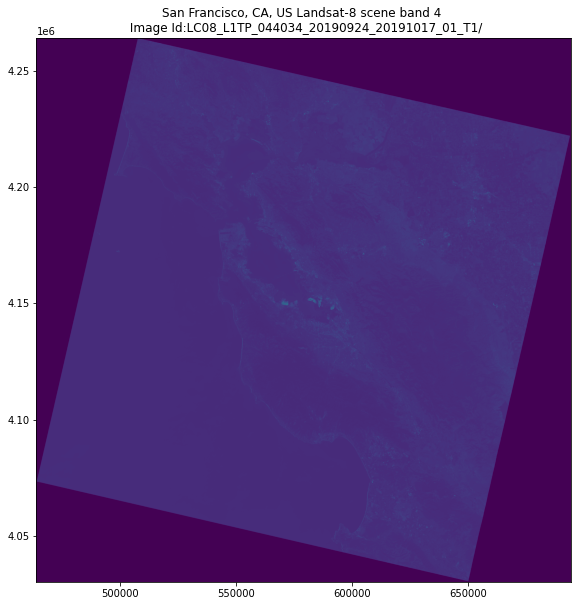

In [32]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
ax.set_title(
    'San Francisco, CA, US Landsat-8 scene band 4 \n Image Id:'
    + fpath_imid
)
plt.show()

In [33]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype('f4')


src_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
src_image_array[src_image_array==0] = np.nan

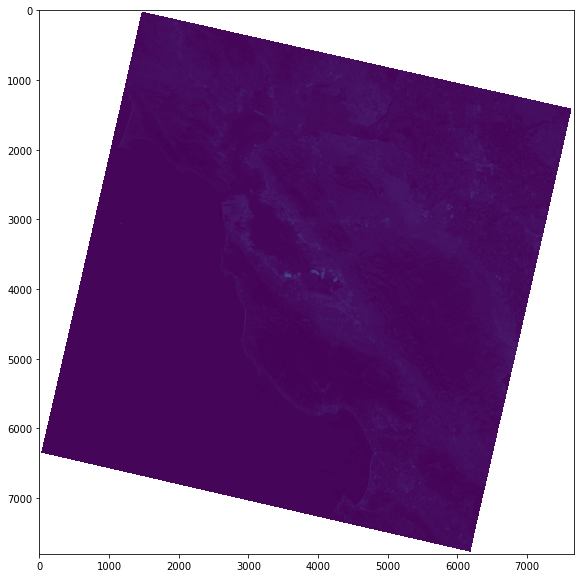

In [35]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image_array, ax=ax)
plt.show()

In [36]:
src_image.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7671, 'height': 7801, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(30.0, 0.0, 464085.0,
       0.0, -30.0, 4264215.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [37]:
window = rio.windows.Window(2000, 2000, 4000, 4000)

In [38]:
subset = src_image.read(1, window=window)

In [39]:
#subset.profile

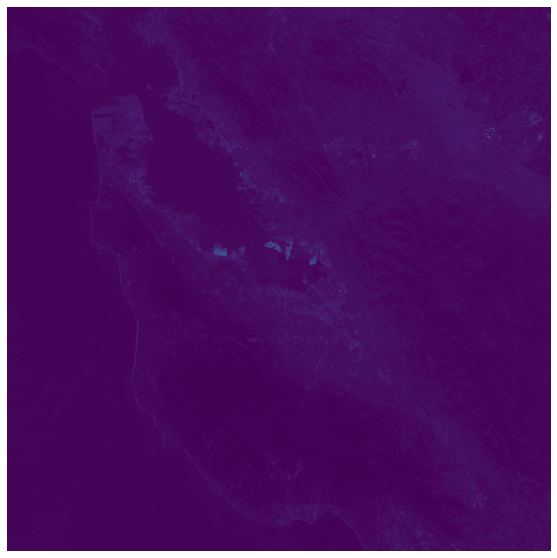

In [40]:
fig, ax = plt.subplots(1, figsize=(12,10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

In [41]:
src_image_array = 0
src_image = 0

In [42]:
def normalize(array):
  array_min, array_max = array.min(), array.max()
  return (array - array_min) / (array_max - array_min)

In [43]:
def make_color_image(b1: int, b2: int, b3: int, fpath: str):
  '''
  make_false_color_image: combine nominated Landsat-8 bands in to false color image

  Parameters:
  b1, b2, b3 int - values between 1 - 6 (inclusive), being a Landsat-8 band number
  fpath str - template for url to Landsat-8 data
  '''

  if not (
      b1 > 0
      and b2 > 0
      and b3 > 0
      and b1 < 7
      and b2 < 7
      and b3 < 7
  ):
      
      raise ValueError(
          f'One or more invalid Landsat-8 band number {b1}, {b2}, {b3} supplied'
      
      )
  #endif

  b1_path = fpath[:-5] + f'{b1}.TIF'
  b2_path = fpath[:-5] + f'{b2}.TIF'
  b3_path = fpath[:-5] + f'{b3}.TIF'

  # print(b3_path)

  b1 = rio.open(b1_path)
  b2 = rio.open(b2_path)
  b3 = rio.open(b3_path)



  b1_np = b1.read(1)
  b2_np = b2.read(1)
  b3_np = b3.read(1)



  b1_norm = normalize(b1_np)
  b2_norm = normalize(b2_np)
  b3_norm = normalize(b3_np)



  rgb = np.dstack((b1_norm, b2_norm, b3_norm))

  return rgb

In [44]:
print(fpath)

http://landsat-pds.s3.amazonaws.com/c1/L8/044/034/LC08_L1TP_044034_20190924_20191017_01_T1/LC08_L1TP_044034_20190924_20191017_01_T1_B2.TIF


In [45]:
rgb = make_color_image(4, 3, 2, fpath)

In [46]:
print(rgb.max())

1.0


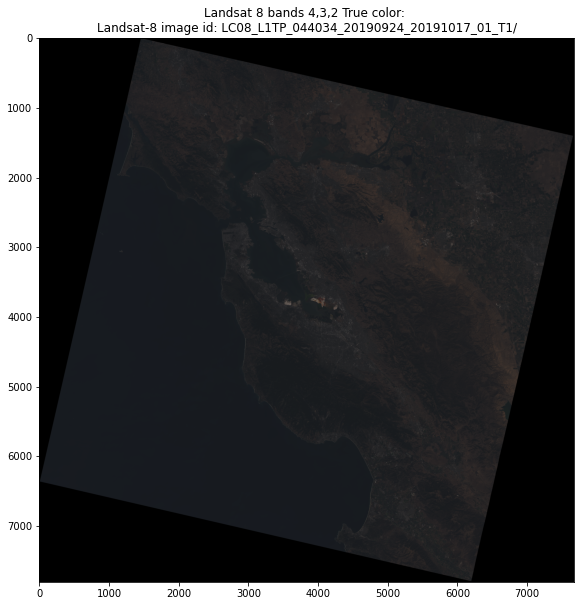

In [47]:
fig, ax = plt.subplots(1, figsize=(12, 10))
ax.set_title(
    'Landsat 8 bands 4,3,2 True color: \nLandsat-8 image id: '
    +fpath_imid
)

#show plot
plt.imshow(rgb)

In [48]:
def make_color_image_eqh(b1: int, b2: int, b3: int, fpath: str):
  '''
  make_false_color_image: combine nominated Landsat-8 bands in to false color image

  Parameters:
  b1, b2, b3 int - values between 1 - 6 (inclusive), being a Landsat-8 band number
  fpath str - template for url to Landsat-8 data
  '''

  if not (
      b1 > 0
      and b2 > 0
      and b3 > 0
      and b1 < 7
      and b2 < 7
      and b3 < 7
  ):
      
      raise ValueError(
          f'One or more invalid Landsat-8 band number {b1}, {b2}, {b3} supplied'
      
      )
  #endif

  b1_path = fpath[:-5] + f'{b1}.TIF'
  b2_path = fpath[:-5] + f'{b2}.TIF'
  b3_path = fpath[:-5] + f'{b3}.TIF'

  # print(b3_path)

  b1 = rio.open(b1_path)
  b2 = rio.open(b2_path)
  b3 = rio.open(b3_path)



  b1_np = b1.read(1)
  b2_np = b2.read(1)
  b3_np = b3.read(1)

  eq_b1 = skimage.exposure.equalize_hist(b1_np)
  eq_b2 = skimage.exposure.equalize_hist(b2_np)
  eq_b3 = skimage.exposure.equalize_hist(b3_np)




  b1_norm = normalize(b1_np)
  b2_norm = normalize(b2_np)
  b3_norm = normalize(b3_np)



  rgb = np.dstack((b1_norm, b2_norm, b3_norm))

  return rgb

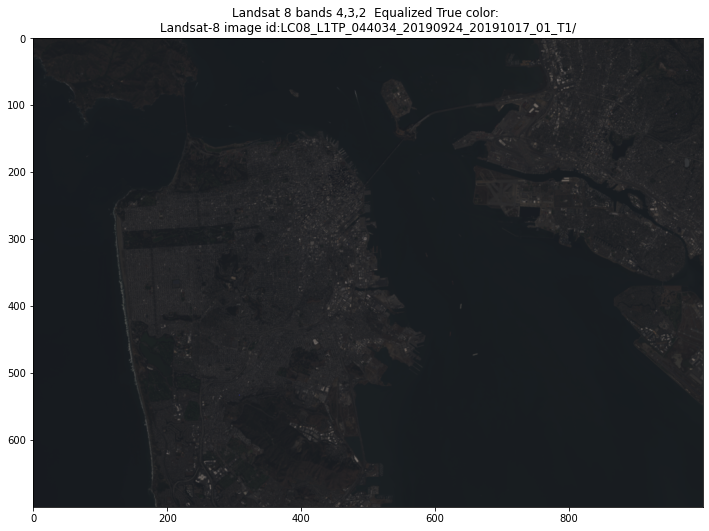

In [49]:
rgb = make_color_image_eqh(4, 3, 2, fpath)

fig, ax = plt.subplots(1, figsize=(12, 10))
ax.set_title(
    'Landsat 8 bands 4,3,2  Equalized True color: \nLandsat-8 image id:'
    +fpath_imid
)

plt.imshow(rgb[2500:3200, 2500:3500, :])

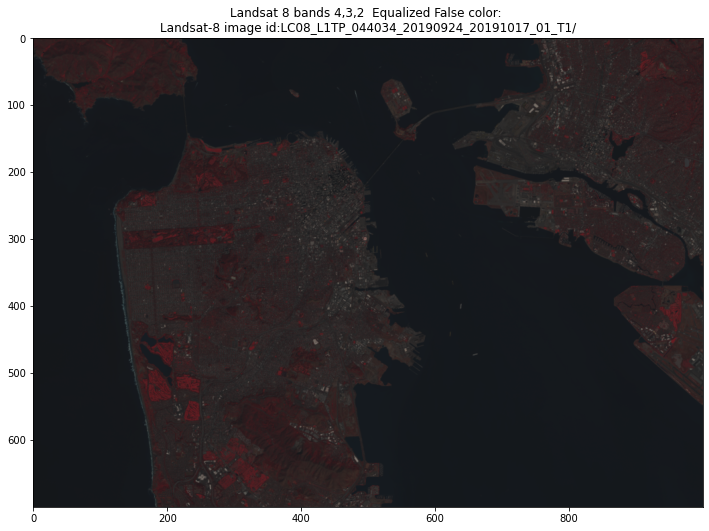

In [50]:
rgb = make_color_image_eqh(5, 4, 3, fpath)

fig, ax = plt.subplots(1, figsize=(12, 10))
ax.set_title(
    'Landsat 8 bands 4,3,2  Equalized False color: \nLandsat-8 image id:'
    +fpath_imid
)

plt.imshow(rgb[2500:3200, 2500:3500, :])

In [51]:
!pip install osmnx

     |████████████████████████████████| 95 kB 4.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 15.7 MB 43.2 MB/s 
     |████████████████████████████████| 994 kB 45.8 MB/s 
     |████████████████████████████████| 11.2 MB 3.1 MB/s 
     |████████████████████████████████| 11.3 MB 3.3 MB/s 
     |████████████████████████████████| 890 kB 45.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: Rtree
    Found existing installation: Rtree 0.8.3
    Uninstalling Rtree-0.8.3:
      Successfully uninstalled Rtree-0.8.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled

In [52]:
import osmnx as ox

In [53]:
import time

In [54]:
from shapely.geometry import Polygon

In [55]:
import os

In [56]:
import numpy as np

In [57]:
def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = np.arange(0, gdf_edges.shape[0], dtype='int')
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)


osmnx version 1.1.2


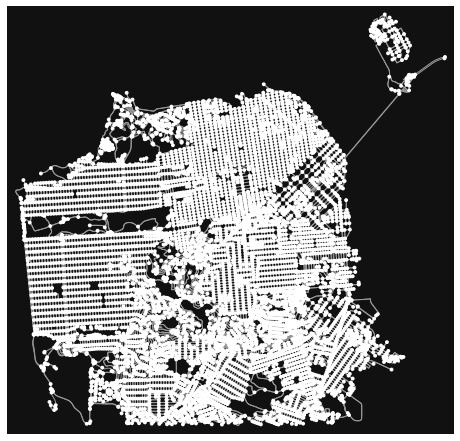

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f14432a2b90>)

In [58]:
place ="San Francisco, US"
G = ox.graph_from_place(place, network_type='drive', which_result=2)

ox.plot_graph(G)



In [59]:
print(type(G))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [60]:
save_graph_shapefile_directional(G, filepath='SanFrancisco')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


In [61]:
print("Loading Shapefile...")

Loading Shapefile...


In [62]:
shapefile = gpd.read_file("/content/SanFrancisco/edges.shp")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


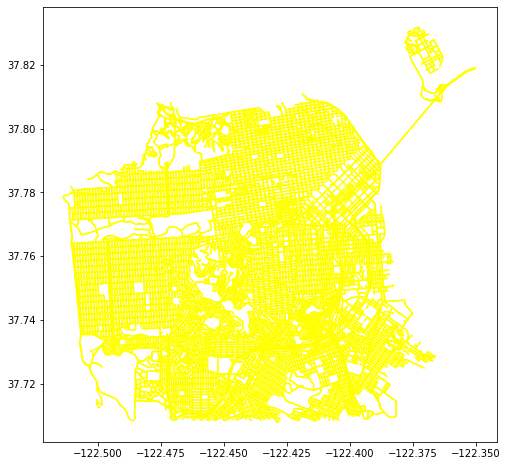

In [63]:
shapefile.plot(column='key', figsize=(16,8), color='yellow')

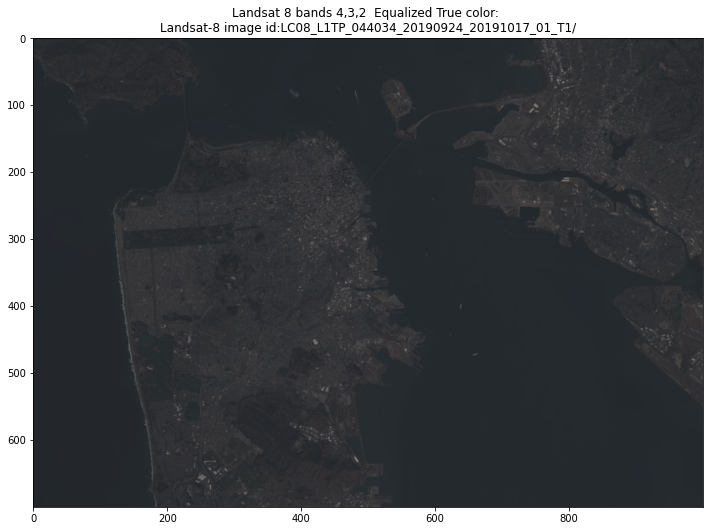

In [64]:
rgb = make_color_image_eqh(4, 3, 2, fpath)
gamma = 1.2
rgb = np.power(rgb, 1/gamma)

fig, ax = plt.subplots(1, figsize=(12, 10))
ax.set_title(
    'Landsat 8 bands 4,3,2  Equalized True color: \nLandsat-8 image id:'
    +fpath_imid
)

plt.imshow(rgb[2500:3200, 2500:3500, :], vmin=100, vmax=200)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


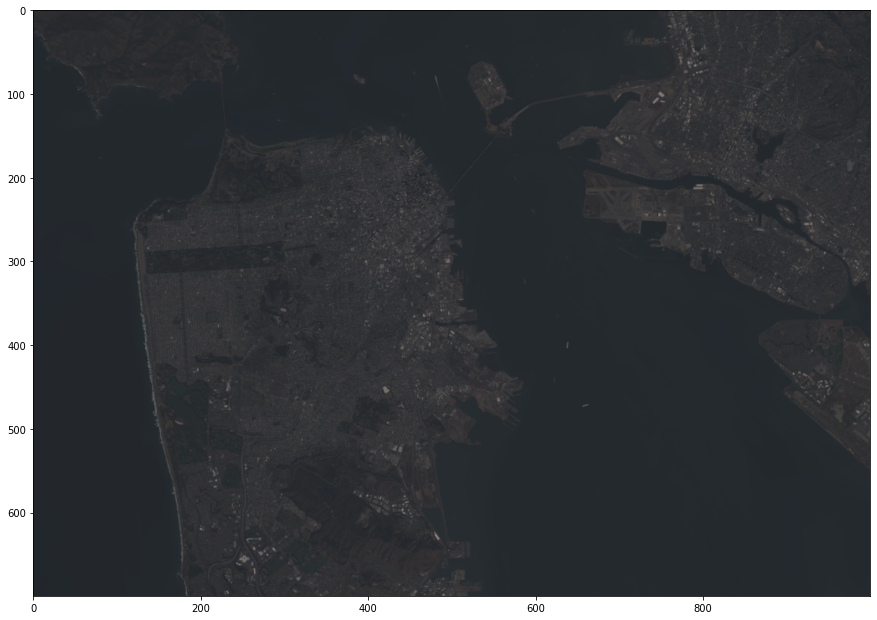

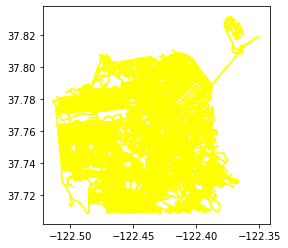

In [65]:
fig, ax = plt.subplots(figsize=[15,15])

ax.imshow(rgb[2500:3200, 2500:3500, :], vmin=100, vmax=200)

shapefile.plot(column='key', color='yellow')